# Lending Club Loan Data Analysis

Course-end Project 2

Name- Nishant Dubey

Objective-Create a model that predicts whether or not a loan will be default using the historical data


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split  
from sklearn.preprocessing  import MinMaxScaler
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [2]:
#Reading dataset 
    
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# Cheching if there is no ( no null found ) and its primary information
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


(9578, 14)

In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [7]:
# Handling imbalanced dataset
not_fully_paid_0 = df[df['not.fully.paid'] ==0]
not_fully_paid_1 = df[df['not.fully.paid'] ==1]

print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 14)
not_fully_paid_1 (1533, 14)


In [8]:
# handling imbalanced data 
from sklearn.utils import resample
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
new_df = pd.concat([not_fully_paid_0, df_minority_upsampled])

from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [9]:
# imbalanced data hamdled
new_df['not.fully.paid'].value_counts()

0    8045
1    8045
Name: not.fully.paid, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in new_df.columns:
    if new_df[i].dtype == 'object':
        
        new_df[i] = le.fit_transform(new_df[i])

In [11]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
4778,1,1,0.1287,201.80,10.858999,6.30,682,10320.000000,9339,33.2,2,1,0,0
3212,1,2,0.1126,105.17,10.596535,0.72,797,4949.958333,24,8.0,5,0,0,0
3993,1,1,0.1126,394.36,10.714418,17.39,722,2699.958333,5079,14.8,2,0,0,0
4473,1,4,0.0740,68.33,10.968198,1.43,772,5490.000000,441,2.8,2,0,0,0
7462,1,2,0.0714,100.56,10.571317,22.65,742,2730.041667,24455,52.9,2,0,0,1


In [12]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending = False)

not.fully.paid       1.000000
int.rate             0.208650
fico                 0.204456
credit.policy        0.195395
inq.last.6mths       0.175083
revol.util           0.110173
pub.rec              0.061573
installment          0.060994
purpose              0.059484
revol.bal            0.057634
log.annual.inc       0.041363
dti                  0.040143
days.with.cr.line    0.032737
delinq.2yrs          0.017038
Name: not.fully.paid, dtype: float64

In [13]:
# Getting features separately into X and OHE the cat. features
X=df.iloc[:,:-1]
X.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [14]:
y=df.iloc[:,-1]
y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [15]:
# Checking Feature set X
X.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


In [16]:
X.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
dtype: object

 # Exploratory Data Analysis
 # Distribution of Data In different features

<Axes: xlabel='purpose', ylabel='count'>

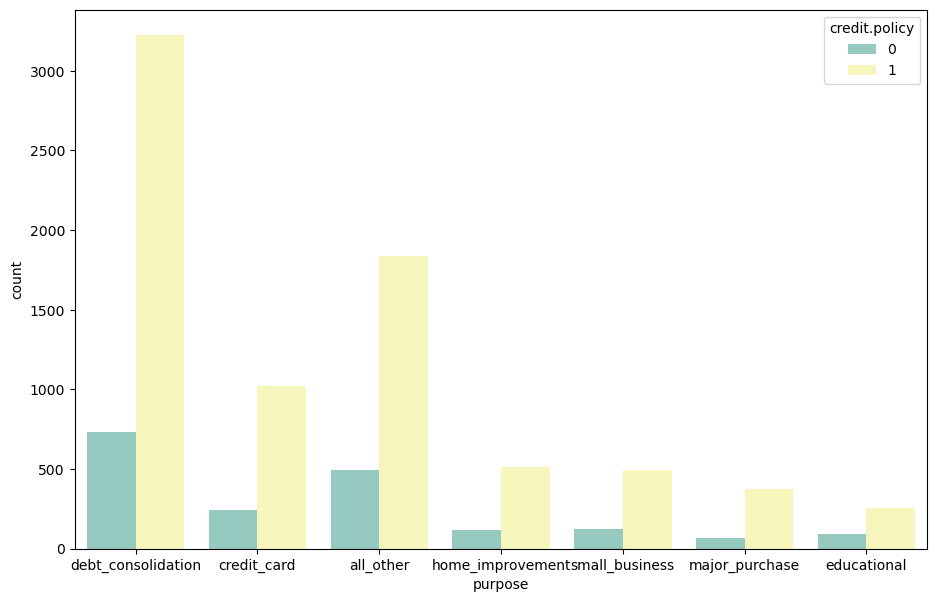

In [17]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='credit.policy',data=df,palette='Set3')

In [18]:
# Distribution of each Feature with credit.policy 1 And 0 seperately

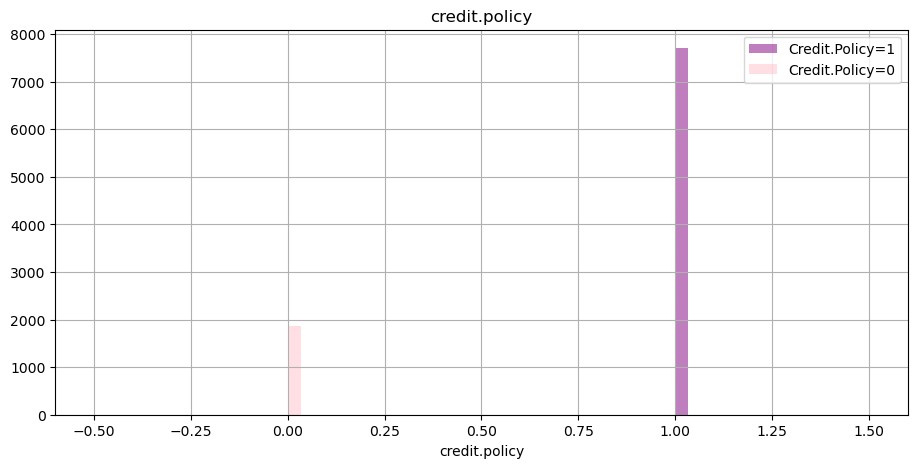

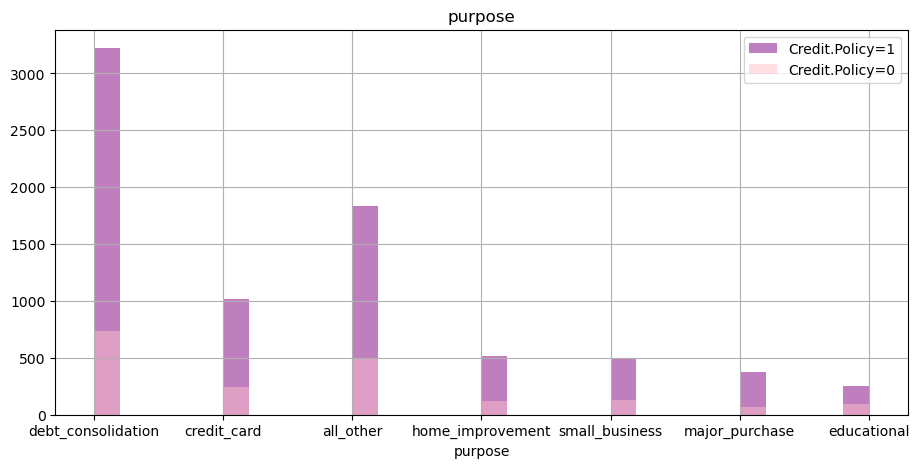

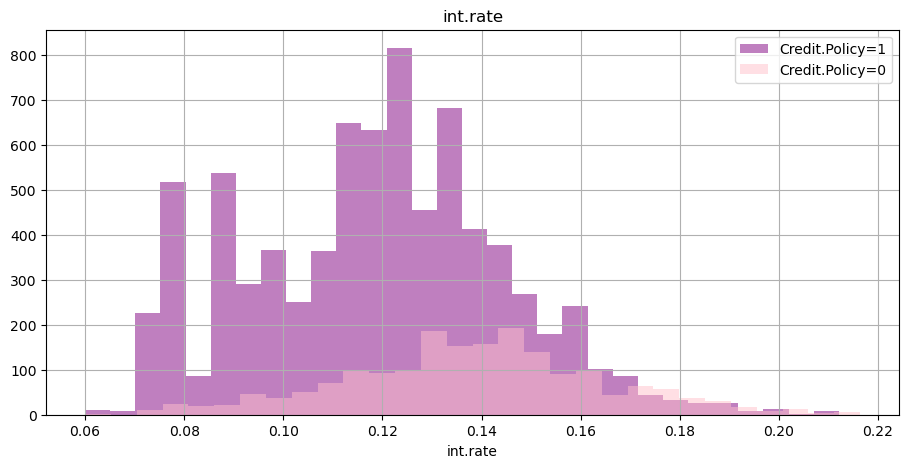

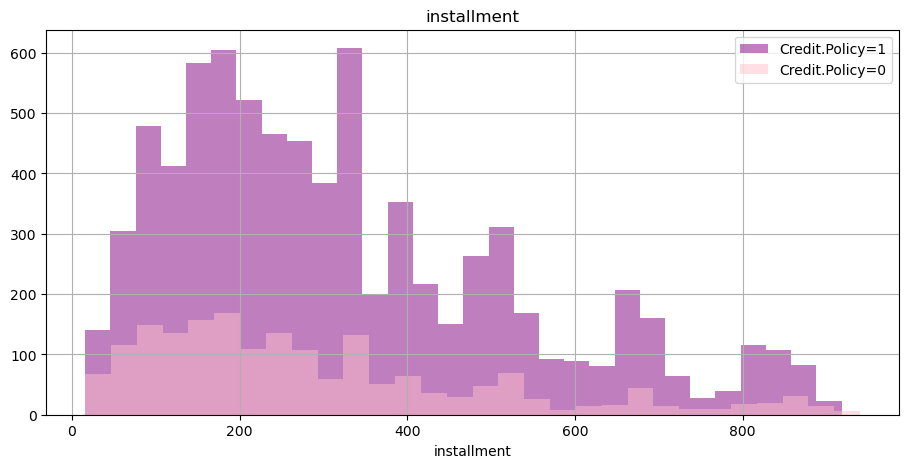

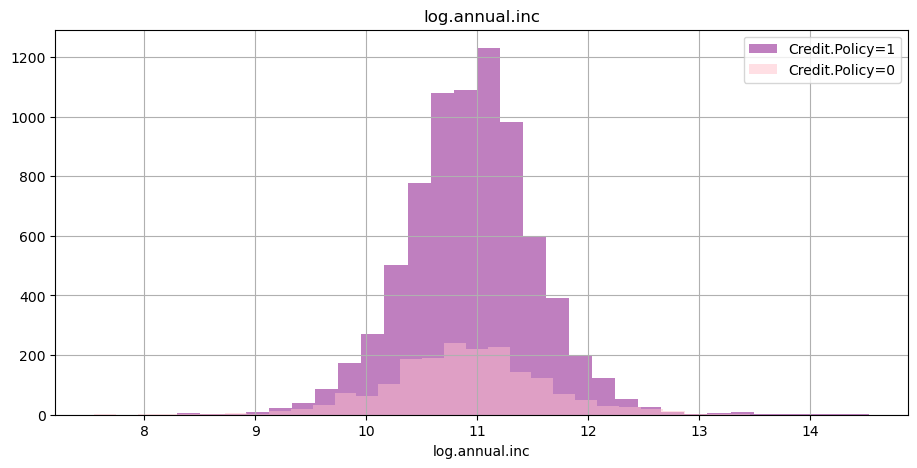

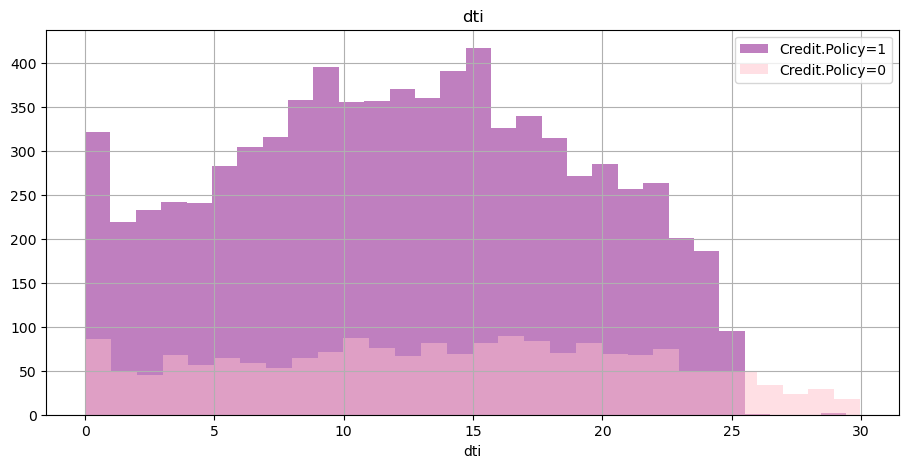

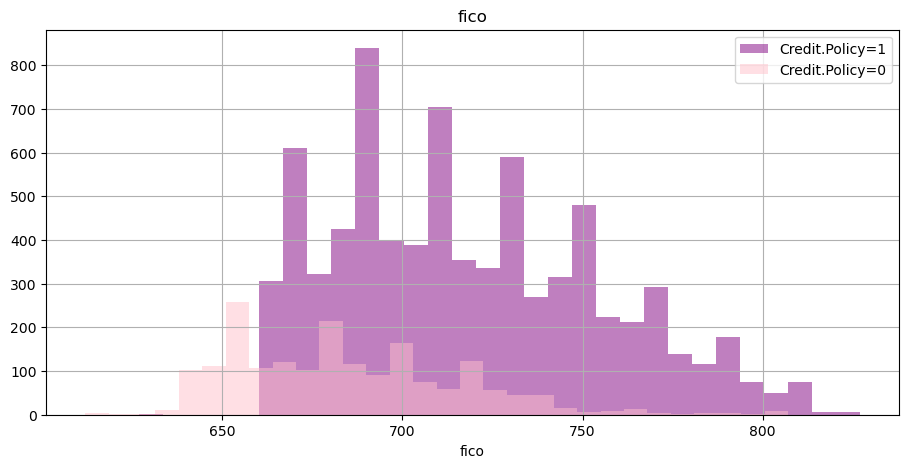

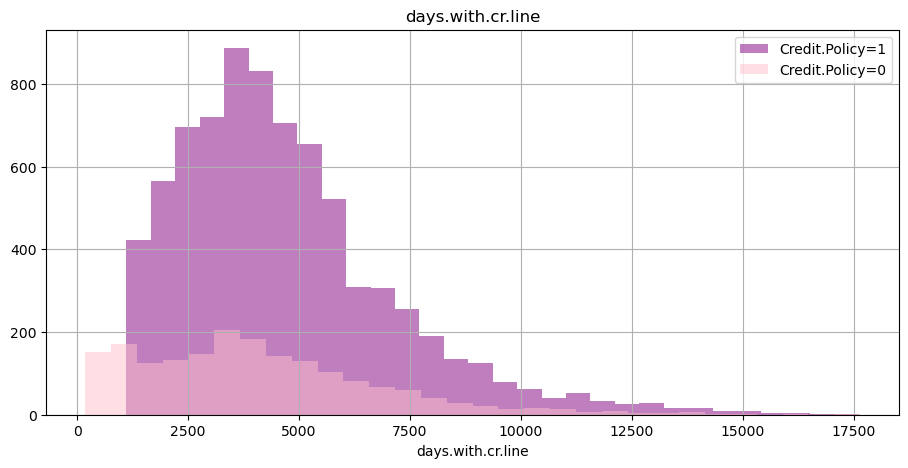

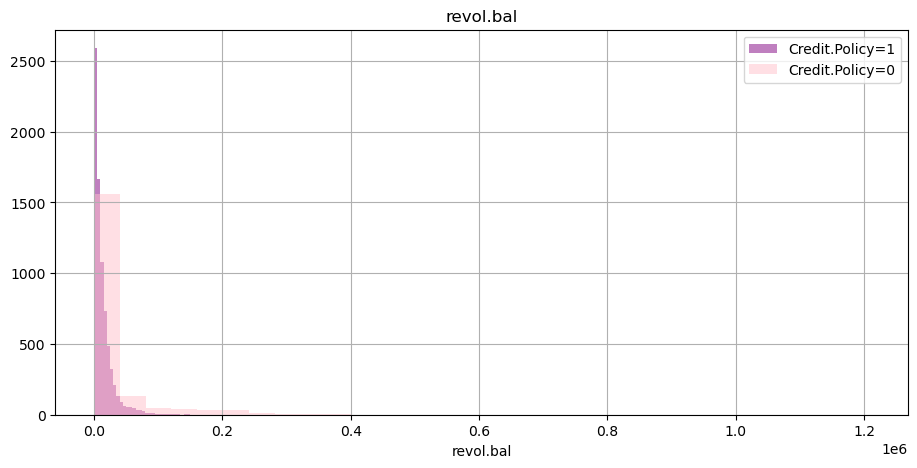

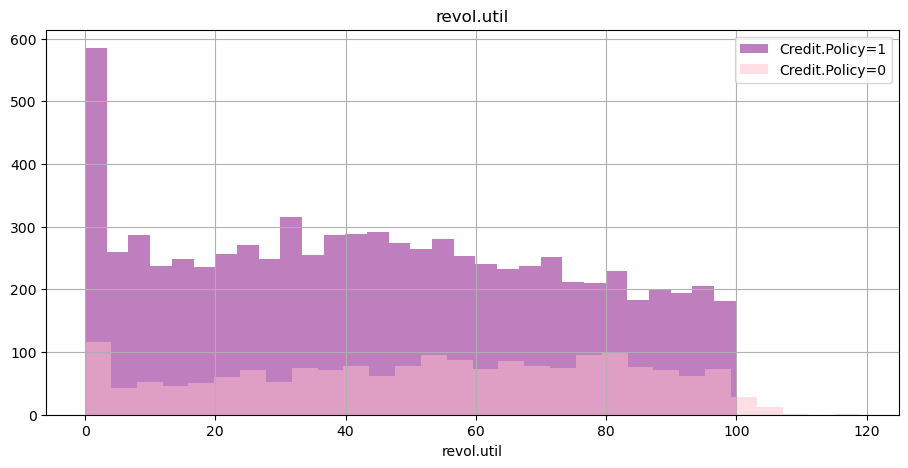

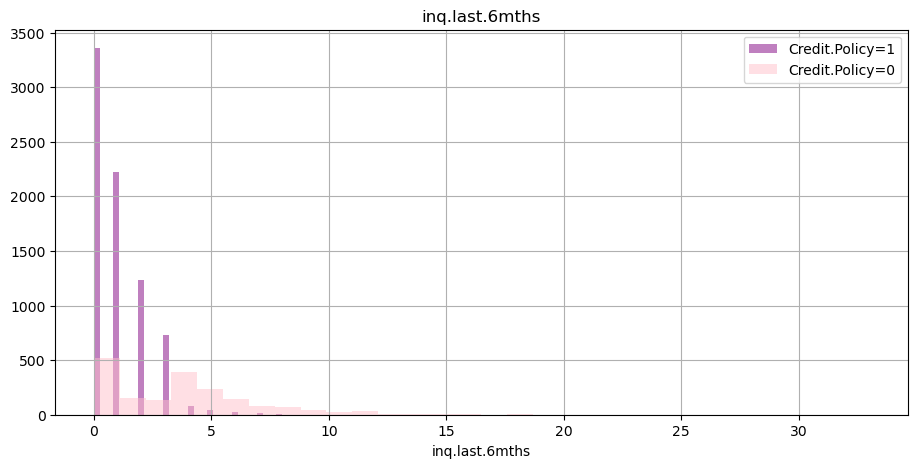

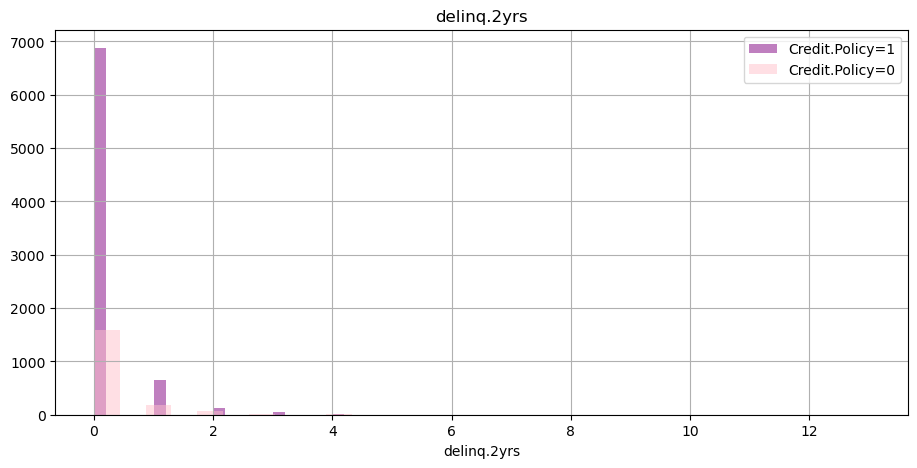

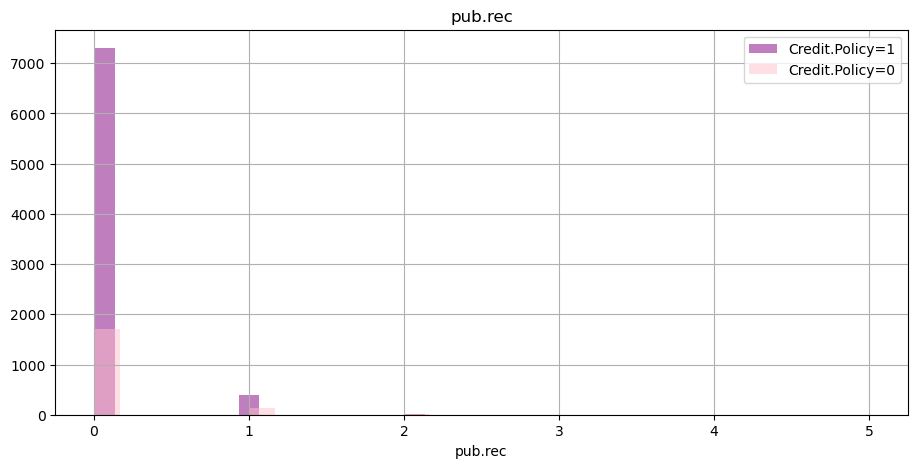

In [19]:
column_name=X.columns

for col in column_name:
    plt.figure(figsize=(11,5))
    df[df['credit.policy']==1][col].hist(alpha=0.5,color='purple',
                                        bins=30,label='Credit.Policy=1')
    df[df['credit.policy']==0][col].hist(alpha=0.5,color='pink',
                                        bins=30,label='Credit.Policy=0')
    plt.legend()
    plt.xlabel(col)
    plt.title(col)
    
    plt.show()

# Checking Coorelation

In [20]:
Num_feature_col=df.select_dtypes(include = ['float','int64'])
cor_matrix = Num_feature_col.corr().abs()
print(cor_matrix)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000  0.294089     0.058770        0.034906   
int.rate                0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                     0.090901  0.220006     0.050202        0.054065   
fico                    0.348319  0.714821     0.086039        0.114576   
days.with.cr.line       0.099026  0.124022     0.183297        0.336896   
revol.bal               0.187518  0.092527     0.233625        0.372140   
revol.util              0.104095  0.464837     0.081356        0.054881   
inq.last.6mths          0.535511  0.202780     0.010419        0.029171   
delinq.2yrs             0.076318  0.156079     0.004368        0.029203   
pub.rec                 0.054243  0.098162     0.032760        0.016506   
not.fully.paid          0

# Coorelation visualization with heatmap

<Axes: >

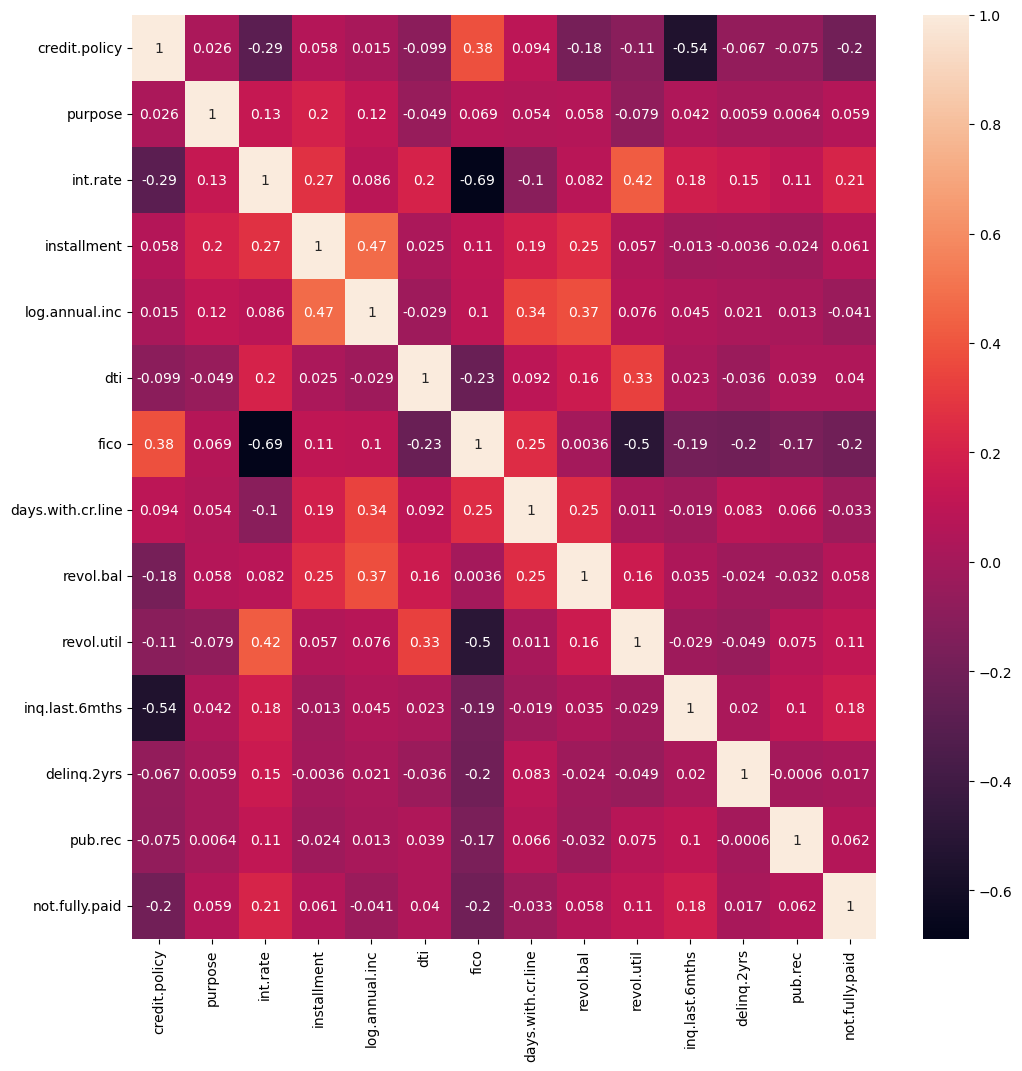

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
f,axes = plt.subplots(1,1,figsize = (12,12))
sns.heatmap(new_df.corr(),annot = True, ax = axes)
            

In [26]:
# int.rate and fico seems to be highly coorelated lets further visualize it by jointly plotting it.

<Figure size 1000x600 with 0 Axes>

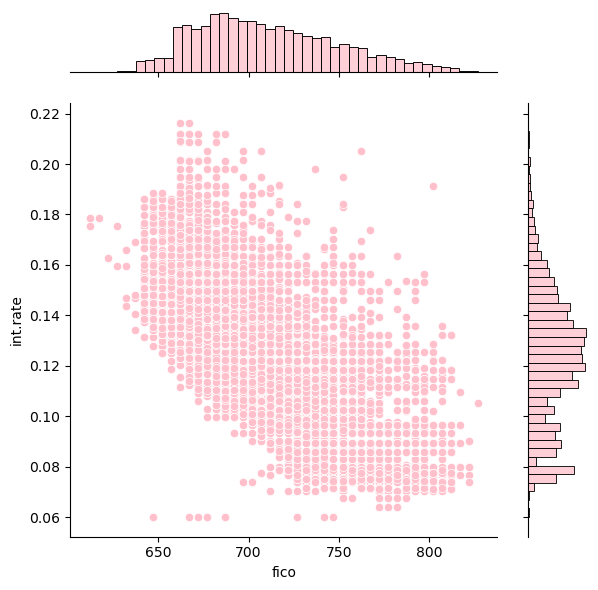

In [24]:
plt.figure(figsize=[10,6])
sns.jointplot(x='fico',y='int.rate',data=df,color='pink', space=0.5)

In [27]:
# Further we are seeing how much coorelation is there between in.rate and fico for both classes in output.

<Figure size 1100x700 with 0 Axes>

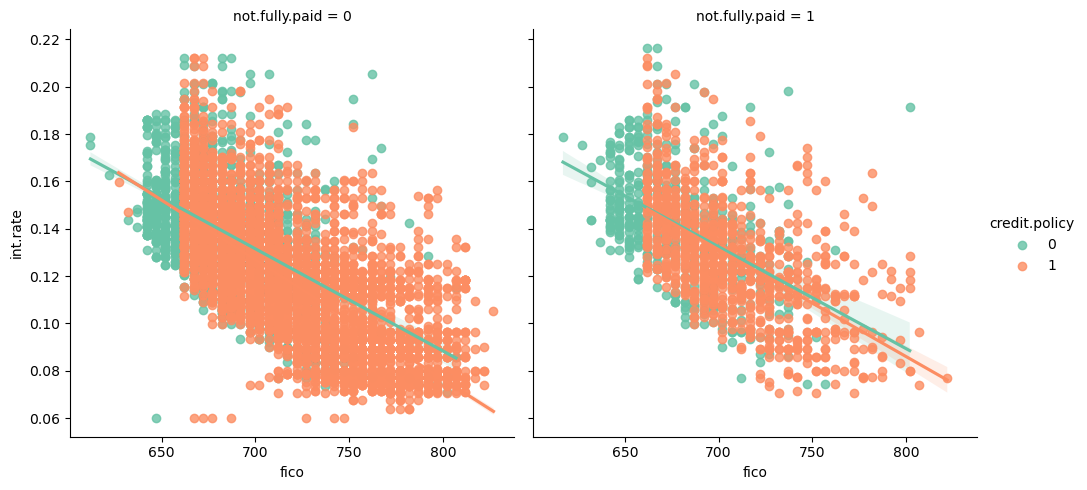

In [28]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
          col='not.fully.paid',palette='Set2')

# Note. The maximum coorelation was shown by features in.rate and fico but their coorelation coefficient is still not around 0.8 to eliminate one of them.

In [30]:
# Visualizing distribution of all features with each target class

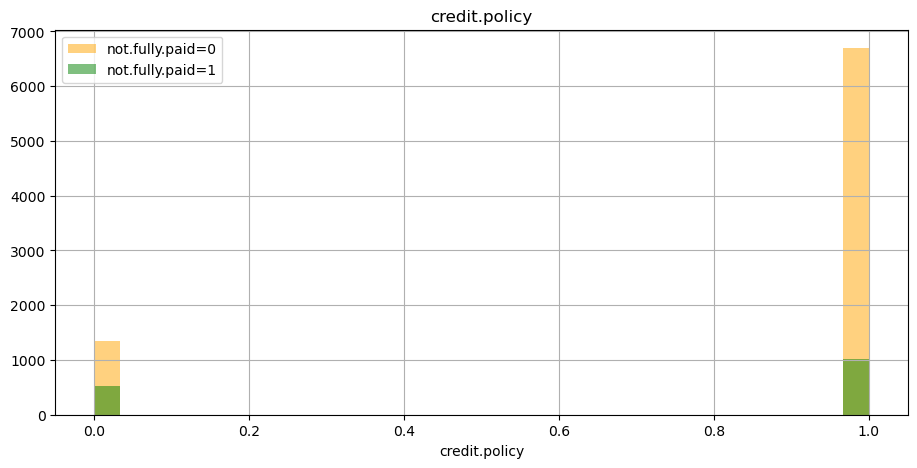

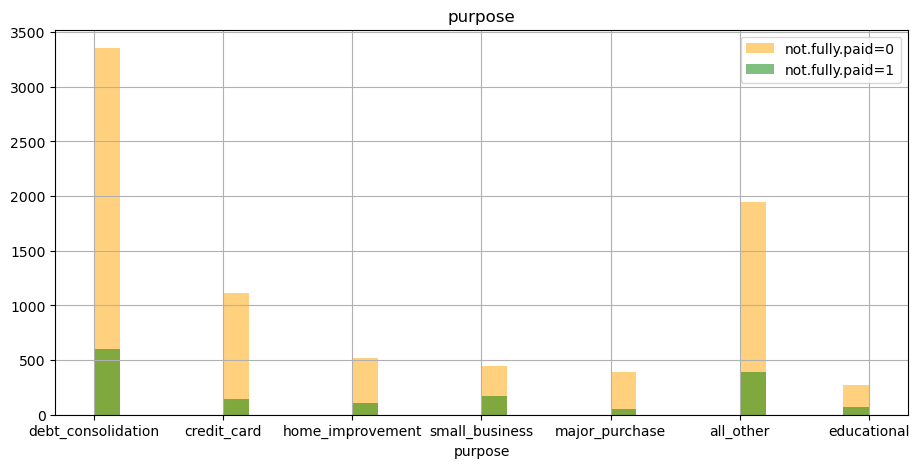

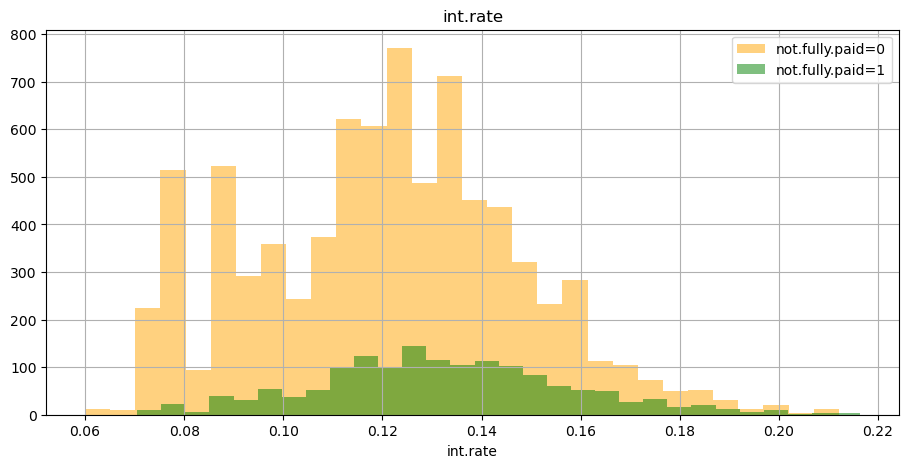

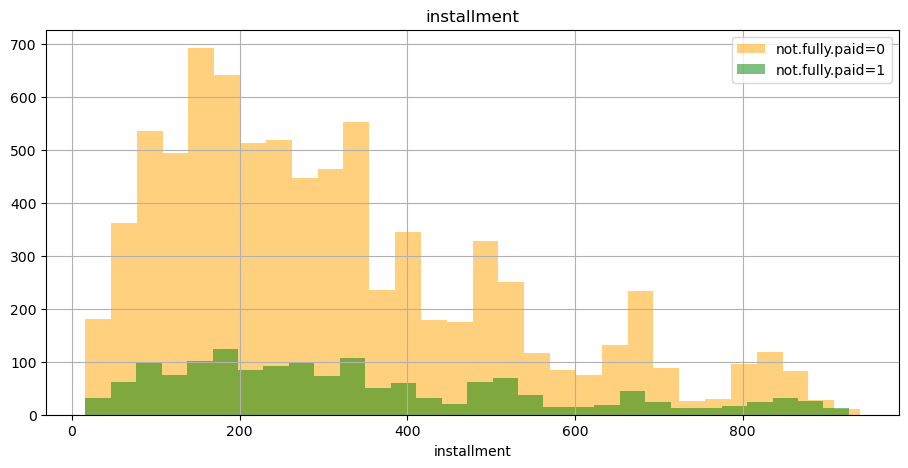

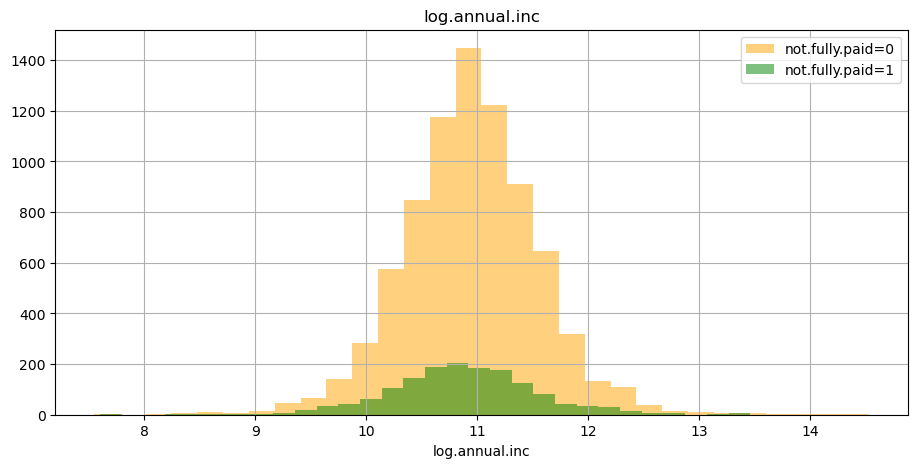

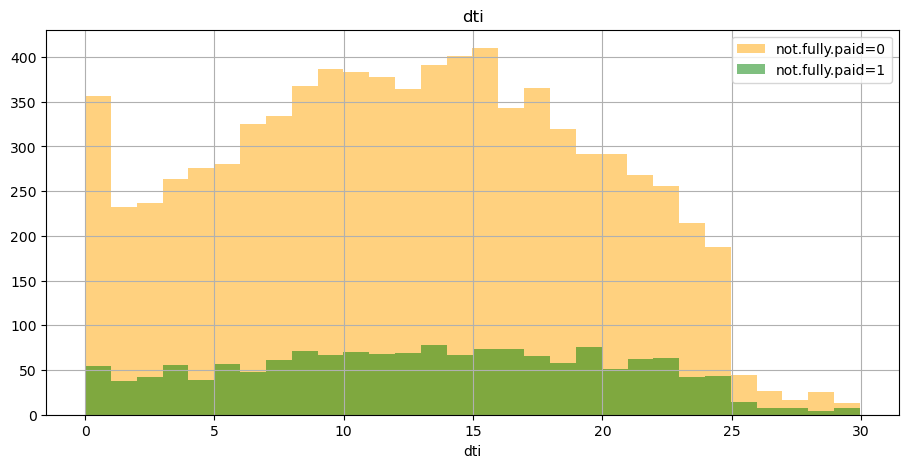

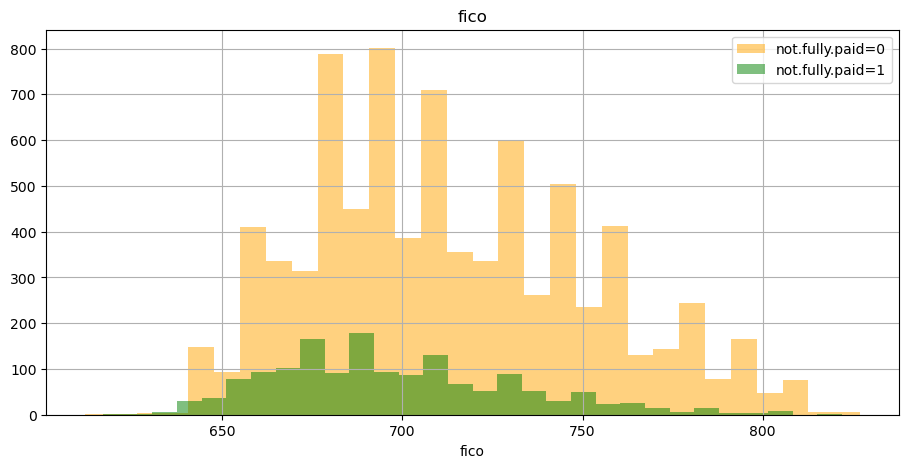

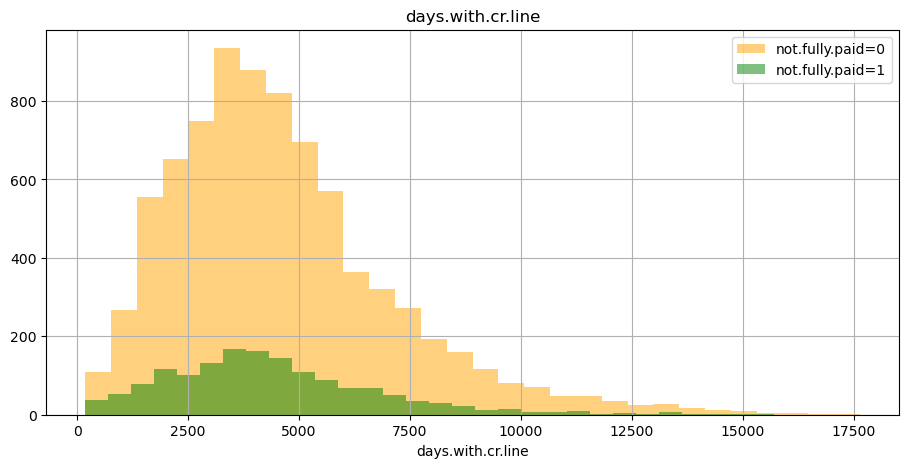

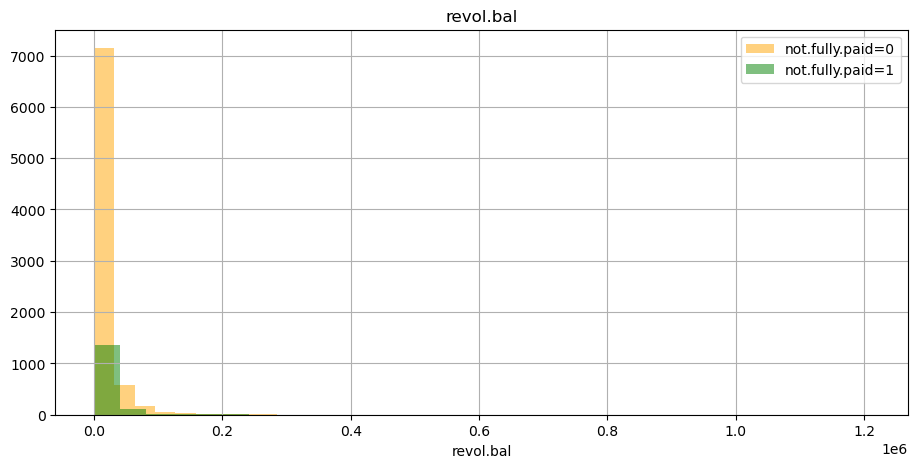

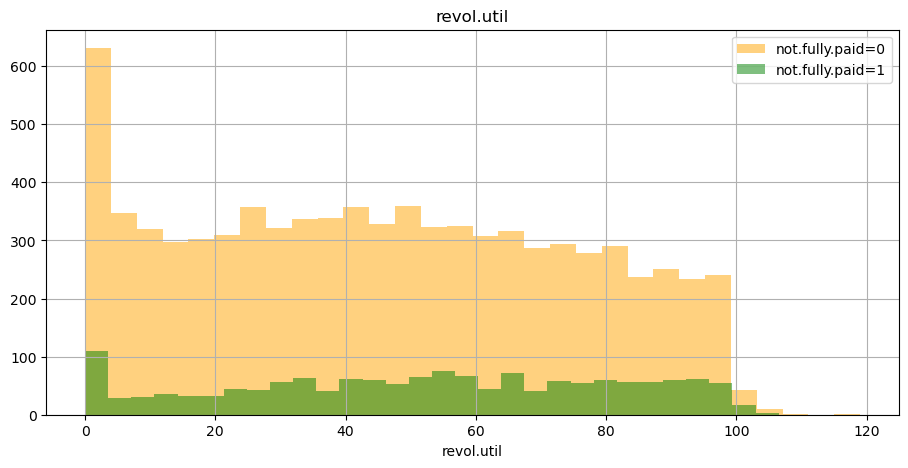

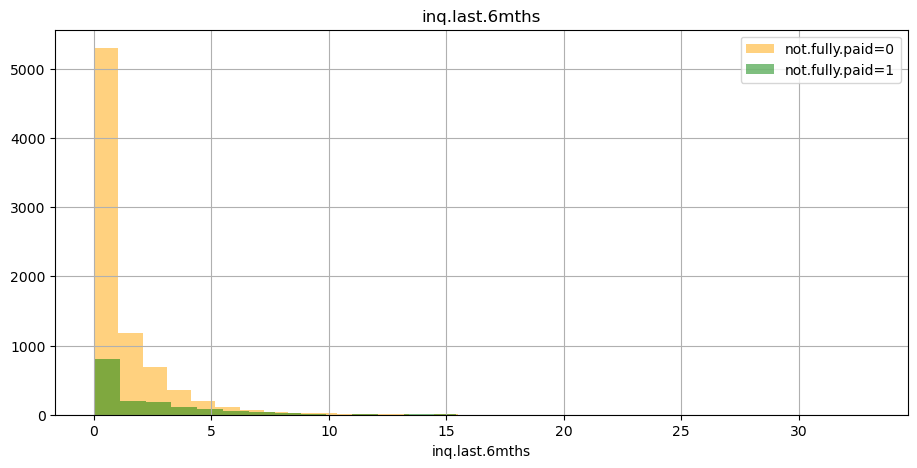

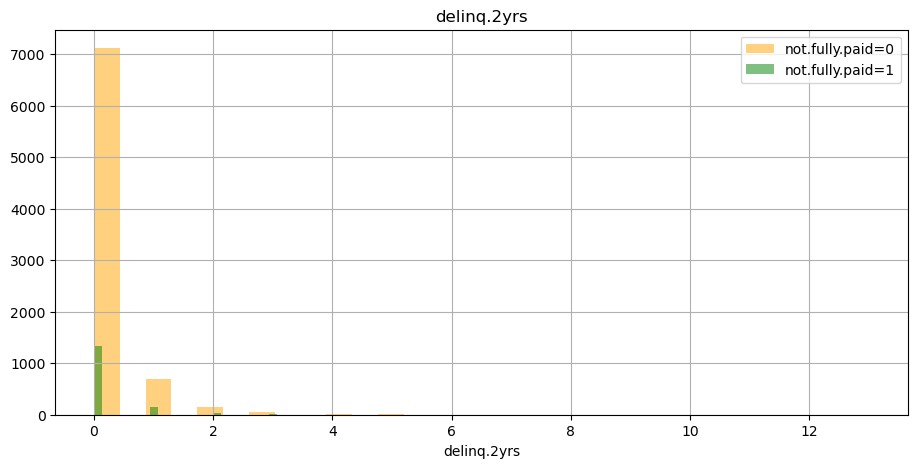

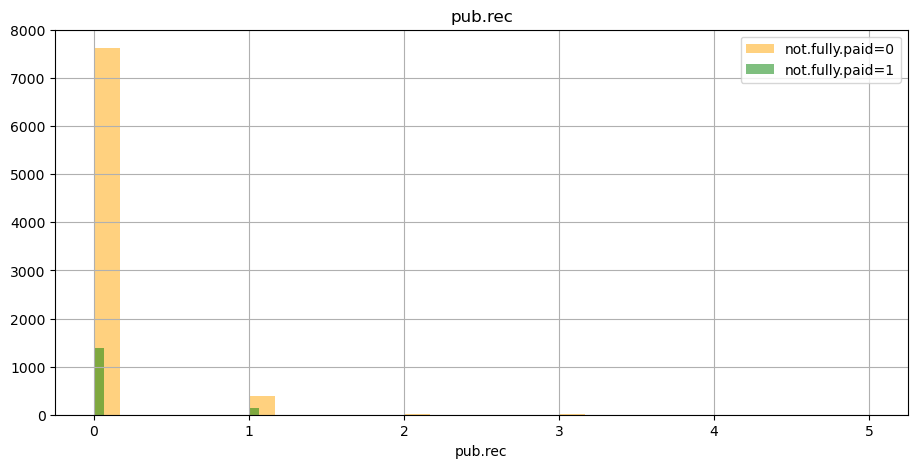

In [33]:
for col in column_name:
    plt.figure(figsize=(11,5))
    df[df['not.fully.paid']==0][col].hist(alpha=0.5,color='orange',
                                         bins=30,label='not.fully.paid=0')
    df[df['not.fully.paid']==1][col].hist(alpha=0.5,color='green',
                                         bins=30,label='not.fully.paid=1')
    plt.legend()
    plt.xlabel(col)
    plt.title(col)
    
    plt.show()

# Categorical to numerical using One Hot Encoding

In [34]:
X=pd.get_dummies(X,drop_first=True)

# Train Test Splitting

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X , y , test_size=0.2 , random_state=20)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(7662, 18) (1916, 18) (7662,) (1916,)


# Standarization using MINMAX Scaler

In [38]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

# Modelling With RandomForest Classifier

In [43]:
model_rfc= RandomForestClassifier(n_estimators=600)
model_rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=600)

# Prediction

In [44]:
pred_rfc=model_rfc.predict(X_test_scaled)

# Evaluation

In [45]:
print('Classification Report of Random Forest Model')
print(classification_report(y_test,pred_rfc))
print('Confusion matrix of Random Forest Model')
print(confusion_matrix(y_test,pred_rfc))

Classification Report of Random Forest Model
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1599
           1       0.67      0.01      0.02       317

    accuracy                           0.84      1916
   macro avg       0.75      0.51      0.47      1916
weighted avg       0.81      0.84      0.76      1916

Confusion matrix of Random Forest Model
[[1597    2]
 [ 313    4]]


# Deep Learning model with keras

In [46]:
from tensorflow.keras.layers import BatchNormalization

#create model
model_DNN = Sequential()

#add model layers
model_DNN.add(Dense(32, activation='relu',input_shape=(18,)))
model_DNN.add(BatchNormalization())
model_DNN.add(Dense(10, activation='relu'))
model_DNN.add(Dense(5, activation='relu'))

#model_DNN.add(Flatten())
model_DNN.add(Dense(1, activation='sigmoid'))

model_DNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1127 (4.40 KB)
Trainable params: 1063 (4.15 KB)
Non-trainable params: 64 (256.00 Byte)
_____________________

In [47]:
y_train=np.array(y_train)
y_test=np.array(y_test)

# Model Fitting

In [50]:
# from tensorflow.keras.callbacks import EarlyStopping
model_DNN.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])
history_DNN=model_DNN.fit(X_train_scaled,y_train,epochs=50,batch_size=125, validation_data=(X_test_scaled,y_test))

Epoch 1/50
62/62 [==============================] - 3s 11ms/step - loss: 0.5365 - accuracy: 0.7770 - val_loss: 0.5209 - val_accuracy: 0.8346
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8348 - val_loss: 0.4861 - val_accuracy: 0.8346
Epoch 3/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4200 - accuracy: 0.8399 - val_loss: 0.4679 - val_accuracy: 0.8346
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8401 - val_loss: 0.4542 - val_accuracy: 0.8346
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4136 - accuracy: 0.8409 - val_loss: 0.4405 - val_accuracy: 0.8346
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8419 - val_loss: 0.4312 - val_accuracy: 0.8340
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8412 - val_loss: 0.4276 - val_accuracy: 0.8346
Epoch 8/50
62/62 [=

# Prediction

In [51]:
pred_DNN=model_DNN.predict(X_test_scaled)

60/60 [==============================] - 0s 2ms/step


# Final Evaluation

In [52]:
_,train_acc = model_DNN.evaluate(X_train_scaled,y_train,verbose=0)
_,test_acc = model_DNN.evaluate(X_test_scaled,y_test,verbose=0)
print('FINAL RESULT\n''Train: %.3f, Test: %3f' %(train_acc,test_acc))

FINAL RESULT
Train: 0.851, Test: 0.831420
